<a href="https://colab.research.google.com/github/AlyssonBaumgarten/reconhecimento/blob/main/C%C3%B3pia_de_aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [ ]:
set(y)

{0, 1, 2}

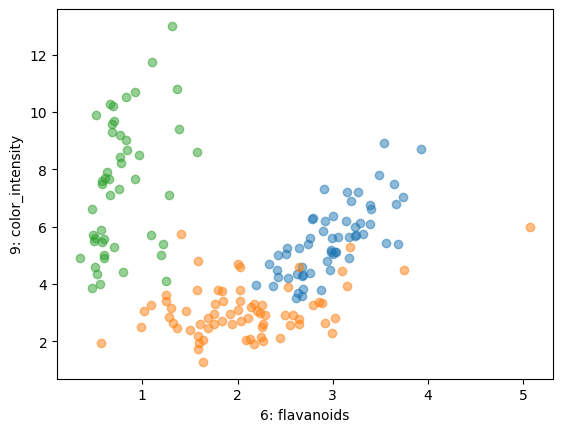

In [ ]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [ ]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [ ]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([5.29289246e-05, 3.60012054e-05, 3.31401825e-05, 4.95910645e-05,
        4.29153442e-05]),
 'score_time': array([0.00108695, 0.00089359, 0.00090122, 0.00116038, 0.00113702]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[19,  1,  2],
       [ 1, 13,  4],
       [ 1,  8,  5]])

In [ ]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.6445736434108528

In [ ]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [ ]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([1.01327896e-04, 4.83989716e-05, 4.48226929e-05, 4.38690186e-05,
        4.26769257e-05]),
 'score_time': array([0.00414491, 0.00206518, 0.00200725, 0.00195312, 0.00197482]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [ ]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([9.20295715e-05, 6.46114349e-05, 4.52995300e-05, 5.05447388e-05,
        5.84125519e-05]),
 'score_time': array([0.00469589, 0.0031755 , 0.00918674, 0.00344276, 0.00327849]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([5.14984131e-05, 4.67300415e-05, 4.98294830e-05, 5.29289246e-05,
        2.29835510e-03, 5.12599945e-05, 7.98702240e-05, 4.48226929e-05,
        4.50611115e-05, 5.98430634e-05, 4.67300415e-05, 4.45842743e-05,
        6.07967377e-05, 4.38690186e-05, 4.60147858e-05, 4.50611115e-05,
        4.36306000e-05, 4.48226929e-05, 5.05447388e-05, 4.50611115e-05,
        4.69684601e-05, 4.57763672e-05, 4.41074371e-05, 5.12599945e-05,
        4.62532043e-05, 4.60147858e-05, 5.05447388e-05, 4.55379486e-05,
        4.57763672e-05, 4.62532043e-05, 4.52995300e-05, 4.55379486e-05,
        4.55379486e-05, 4.52995300e-05, 5.57899475e-05, 5.60283661e-05,
        4.79221344e-05, 6.10351562e-05, 5.29289246e-05, 4.95910645e-05,
        4.74452972e-05, 7.08103180e-05, 4.45842743e-05, 4.43458557e-05,
        4.45842743e-05, 4.72068787e-05, 4.83989716e-05, 4.41074371e-05,
        4.50611115e-05, 6.46114349e-05]),
 'score_time': array([0.00692654, 0.00751352, 0.0066669 , 0.00464559, 0.00466657,


In [ ]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50999

(Perceptron(), 0.0005617134727509441)

In [ ]:
modelo.intercept_

array([-105.,  114.,   19.])

In [ ]:
modelo.coef_[:,[6,9]]

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

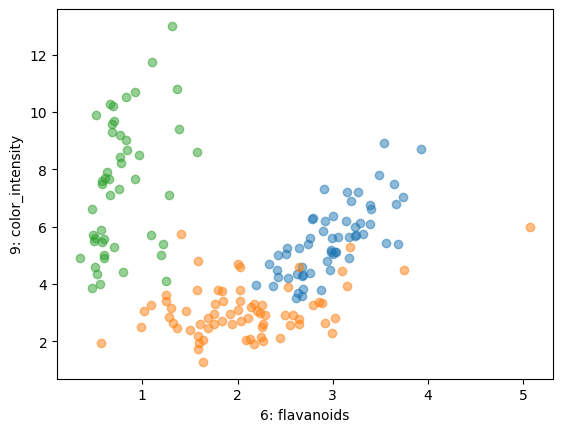

In [ ]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)


plt.show()



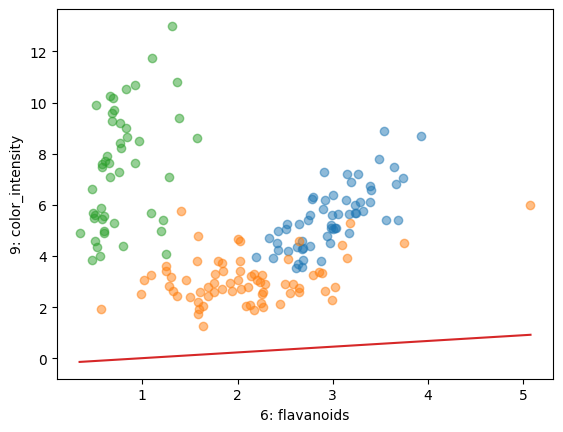

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define os índices das características que serão usadas
i, j = 6, 9

# Define os rótulos dos eixos x e y usando os índices e os nomes das características
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

# Plota os pontos de dados coloridos de acordo com as classes
for k in set(y):
    plt.plot(X[:, i][y==k], X[:, j][y==k], "o", alpha=0.5, label=f"Classe {k}")

# Obtém os coeficientes do Perceptron para as características selecionadas
coef = modelo.coef_[0]  # Apenas os coeficientes da primeira classe

# Calcula e plota a reta que separa as classes
x_vals = np.linspace(min(X[:, i]), max(X[:, i]), 100)
y_vals = (-coef[i] / coef[j]) * x_vals - (modelo.intercept_[0] / coef[j])
plt.plot(x_vals, y_vals, label="Fronteira de Decisão")

# Adiciona uma legenda para as classes e a fronteira de decisão
#plt.legend()

# Exibe o gráfico
plt.show()


# Exibe o gráfico
plt.show()


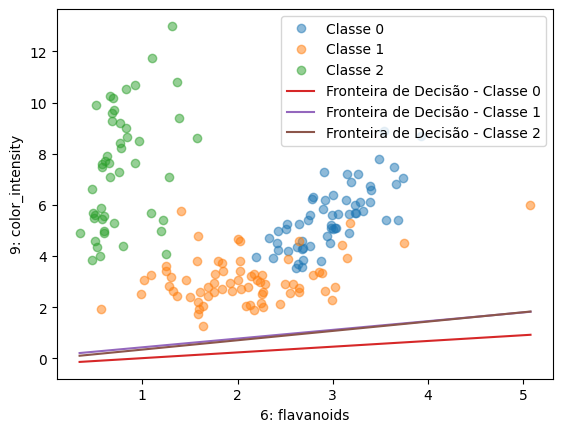

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define os índices das características que serão usadas
i, j = 6, 9

# Define os rótulos dos eixos x e y usando os índices e os nomes das características
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

# Plota os pontos de dados coloridos de acordo com as classes
for k in set(y):
    plt.plot(X[:, i][y == k], X[:, j][y == k], "o", alpha=0.5, label=f"Classe {k}")

# Obtém os coeficientes do Perceptron para as características selecionadas
coef = modelo.coef_  # Coeficientes de todas as classes

# Calcula e plota a reta que separa as classes para cada classe
for c in range(coef.shape[0]):
    x_vals = np.linspace(min(X[:, i]), max(X[:, i]), 100)
    y_vals = (-coef[c, i] / coef[c, j]) * x_vals - (modelo.intercept_[c] / coef[c, j])
    plt.plot(x_vals, y_vals, label=f"Fronteira de Decisão - Classe {c}")

# Adiciona uma legenda para as classes e a fronteira de decisão
plt.legend()

# Exibe o gráfico
plt.show()


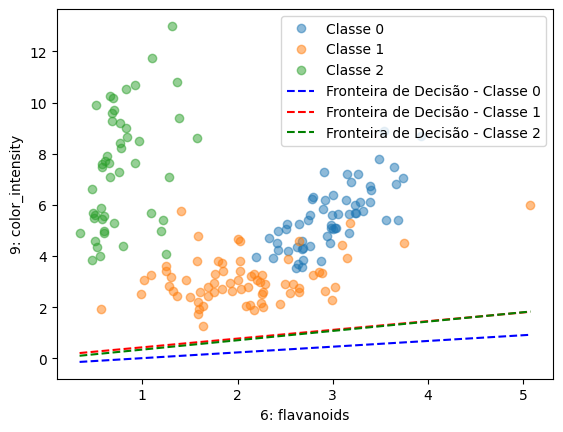

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Defina os índices das características que serão usadas
i, j = 6, 9

# Defina os rótulos dos eixos x e y usando os índices e os nomes das características
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

# Crie uma lista de cores para as fronteiras de decisão
cores = ['b', 'r', 'g']

# Plote os pontos de dados coloridos de acordo com as classes
for k in set(y):
    plt.plot(X[:, i][y == k], X[:, j][y == k], "o", alpha=0.5, label=f"Classe {k}")

# Obtém os coeficientes do Perceptron para as características selecionadas
coef = modelo.coef_

# Calcula e plota a reta que separa as classes para cada classe usando cores diferentes
for c in range(coef.shape[0]):
    x_vals = np.linspace(min(X[:, i]), max(X[:, i]), 100)
    y_vals = (-coef[c, i] / coef[c, j]) * x_vals - (modelo.intercept_[c] / coef[c, j])
    plt.plot(x_vals, y_vals, '--', color=cores[c], label=f"Fronteira de Decisão - Classe {c}")

# Adicione uma legenda para as classes e a fronteira de decisão
plt.legend()

# Exiba o gráfico
plt.show()
